# KNN (K-nearest neighbours)

# Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset

In [4]:
data= pd.read_csv(r'iris.csv')

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.shape

(150, 5)

In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(3)

In [9]:
data = data.drop_duplicates()

In [10]:
data.duplicated().sum()

np.int64(0)

# Identify the X and Y

In [11]:
X = data.drop(columns=['species'], axis=1) #Independent valriable

In [12]:
y= data['species'] #Depemdent variable

# split the data into training and test set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [15]:
X_train.shape, y_train.shape

((117, 4), (117,))

In [16]:
X_test.shape, y_test.shape

((30, 4), (30,))

# Model Building

# Step 1: Find K

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

In [18]:
precision_value = []
k_values = list(range(1,11))

In [20]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors= k)
    # trian the model
    knn.fit(X_train, y_train)
    #predict
    y_pred = knn.predict(X_test)
    precision= precision_score(y_test, y_pred,average='weighted')
    precision_value.append(precision)

In [21]:
# Visualize

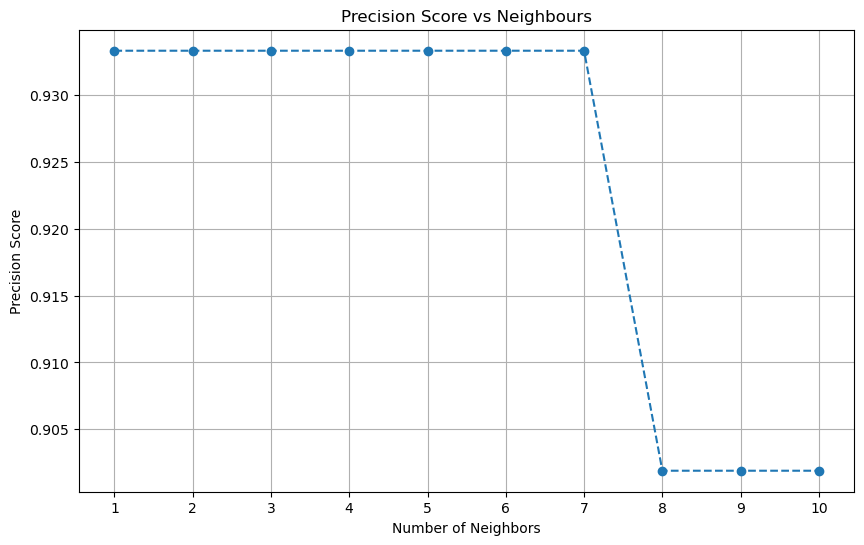

In [22]:
plt.figure(figsize=(10,6))

plt.plot(k_values,precision_value, marker='o',linestyle='--')

plt.xlabel('Number of Neighbors')
plt.ylabel('Precision Score')
plt.title('Precision Score vs Neighbours')
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [ ]:
# to find best k

In [23]:


print("Best value of k is :", best_k)

Best value of k is : 1


In [24]:
# Build the model with best k

In [25]:
knn = KNeighborsClassifier(n_neighbors=best_k)

In [26]:
# fit the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
y_pred = knn.predict(X_test)

In [28]:
# Model Evaluation

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print('Confusion matrix')
cm= confusion_matrix(y_test, y_pred)

print(cm)

Confusion matrix
[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [34]:
print('Classification Report')
cr= classification_report(y_test, y_pred)

print(cr)

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Use of KNN

# Handling missing values

# KNN imputer

In [35]:
# prepare the data 
data = {
    'age': [23,np.nan,45,34],
    'salray':[2234,4356,5688,np.nan],
    'exp':[np.nan,3,5,7]
}

In [36]:
df= pd.DataFrame(data)

In [37]:
df.head()

,age,salray,exp
0,23.0,2234.0,NaN
1,NaN,4356.0,3.0
2,45.0,5688.0,5.0
3,34.0,NaN,7.0


In [38]:
from sklearn.impute import KNNImputer

In [40]:
# Initailize
imputer = KNNImputer(n_neighbors=2)


In [41]:
# Impute the missing values

In [42]:
df_imputed= imputer.fit_transform(df)

In [43]:
print('Data after imputed')
df_imputed

Data after imputed


array([[2.300e+01, 2.234e+03, 5.000e+00],
       [3.950e+01, 4.356e+03, 3.000e+00],
       [4.500e+01, 5.688e+03, 5.000e+00],
       [3.400e+01, 5.022e+03, 7.000e+00]])

In [44]:
pd.DataFrame(df_imputed)

,0,1,2
0,23.0,2234.0,5.0
1,39.5,4356.0,3.0
2,45.0,5688.0,5.0
3,34.0,5022.0,7.0
